In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,f1_score,roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
# np.random.seed(42)
# tf.random.set_seed(42)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/My\ Drive/

In [2]:
df = pd.read_csv('creditcard.csv')

In [12]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [36]:
iF = IsolationForest(bootstrap=False)
pred = np.where(iF.fit_predict(df) == -1 ,1, 0)

In [37]:
roc_auc_score(df.Class, pred)

0.903242084919838

In [38]:
f1_score(df.Class, pred)

0.0726159230096238

In [39]:
if_cm=confusion_matrix(df.Class, pred)

<AxesSubplot:>

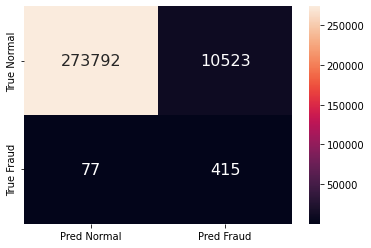

In [40]:
import seaborn as sns
     
df_cm = pd.DataFrame(if_cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')